<a href="https://colab.research.google.com/github/Mohamed-ux-beep/Latent-Dirichlet-Allocation/blob/main/Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

In [4]:
num_münzen = 1000
num_würfe = 1000

fair = np.random.choice(['kopf', 'zahl'], size=(num_münzen, num_würfe), p=[0.5, 0.5])
unfair = np.random.choice(['kopf', 'zahl'], size=(num_münzen, num_würfe), p=[2/3, 1/3])

In [15]:
# Berechnung der relativen Häufigkeiten
def calculate_relative_frequencies(throws):
    unique, counts = np.unique(throws, return_counts=True)
    frequencies = dict(zip(unique, counts / throws.size))
    return frequencies

fair_coin_frequencies = calculate_relative_frequencies(fair)
unfair_coin_frequencies = calculate_relative_frequencies(unfair)

# Ergebnisse ausgeben
print("Relative Häufigkeiten für faire Münze:")
print(fair_coin_frequencies)

print("\nRelative Häufigkeiten für unfaire Münze:")
print(unfair_coin_frequencies)

Relative Häufigkeiten für faire Münze:
{'kopf': 0.499728, 'zahl': 0.500272}

Relative Häufigkeiten für unfaire Münze:
{'kopf': 0.666105, 'zahl': 0.333895}


In [47]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Define the vocabulary and topic distributions
vocabulary = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
topic_distributions = {
    'Thema 1': [0.03, 0.27, 0.3, 0.04, 0.03, 0.26, 0.015, 0.04, 0.015],
    'Thema 2': [0.035, 0.01, 0.03, 0.27, 0.3, 0.01, 0.03, 0.285, 0.03],
    'Thema 3': [0.3, 0.015, 0.025, 0.02, 0.05, 0.05, 0.285, 0.015, 0.24]
}

# Manually create a document of length 3
manual_document = np.random.choice(vocabulary, size=3)
print("Manually created document of length 3:", manual_document)

# Function to generate a document based on a given topic distribution
def generate_document(topic_distribution, length):
    return np.random.choice(vocabulary, size=length, p=topic_distribution)

# Generate 20 documents with random length between 10 and 15 words
documents = []
for _ in range(20):
    length = np.random.randint(10, 16)
    topic = np.random.choice(['Thema 1', 'Thema 2', 'Thema 3'])
    document = generate_document(topic_distributions[topic], length)
    documents.append(document)

# Convert documents to DataFrame for easy handling
df_documents = pd.DataFrame(documents)

# Display the generated documents
print("Generated documents:")
print(df_documents)

# Count occurrences of each word
word_counts = df_documents.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
relative_frequencies = word_counts / word_counts.sum()

# Display the relative frequencies
print("\nRelative Frequencies:")
print(relative_frequencies)


Manually created document of length 3: ['G' 'D' 'H']
Generated documents:
   0  1  2  3  4  5  6  7  8  9     10    11    12    13    14
0   B  B  B  F  D  F  A  H  F  B     B     B     C     C  None
1   B  D  B  B  C  C  F  B  C  C     B     D     B  None  None
2   H  F  C  B  F  C  B  C  B  F     B  None  None  None  None
3   E  D  E  A  H  E  E  H  H  D     E     E     H  None  None
4   B  F  C  B  C  B  F  B  I  F     B     A     F     F  None
5   I  A  D  A  I  G  C  A  B  C     G     G  None  None  None
6   G  A  G  I  G  I  G  G  F  A     A     A  None  None  None
7   C  F  B  C  F  B  B  B  B  F  None  None  None  None  None
8   E  H  H  D  H  E  H  H  D  D     D     E     H     H  None
9   F  A  A  C  I  C  G  G  E  I     I     A     G     B     A
10  G  G  A  A  I  A  A  G  I  A  None  None  None  None  None
11  I  A  G  E  G  G  G  A  I  C     A     A     G  None  None
12  G  I  D  A  I  E  G  I  G  G     A     G  None  None  None
13  A  A  I  G  A  I  I  G  I  A     A  None

In [144]:
expression = r"\[?\]?\'?"

def find_replace(pattern, input_string):
  result = re.sub(pattern, "", input_string)
  return result

In [145]:
file_path = "/content/uebung08docs.txt"

docs = []
with open(file_path, 'r') as f:

  for i, line in enumerate(f):
    result = find_replace(expression, line)
    result = [element.strip() for element in result.split(',') if element != '\n']
    docs.append(result)

In [146]:
print(f"we have {len(docs)} docs")

we have 100 docs


In [160]:
import numpy as np

# Define your corpus (list of documents)
corpus = docs

# Define vocabulary (list of unique words)
vocab = vocabulary

# Define hyperparameters
K = 3  # Number of topics
alpha = 0.5
beta = 0.5

# Initialize topic assignments randomly
# topics[i][j] represents the topic assignment of word j in document i
topics = [[np.random.randint(0, K) for _ in range(len(doc))] for doc in corpus]

# Initialize count matrices
# word_topic_count[k][w] represents the count of word w assigned to topic k
word_topic_count = np.zeros((K, len(vocab)), dtype=int)
# doc_topic_count[i][k] represents the count of words assigned to topic k in document i
doc_topic_count = np.zeros((len(corpus), K), dtype=int)

# Initialize counts based on initial topic assignments
for i, doc in enumerate(corpus):
    for j, word in enumerate(doc):
        topic = topics[i][j]
        word_idx = vocab.index(word)
        word_topic_count[topic][word_idx] += 1
        doc_topic_count[i][topic] += 1

# Perform Gibbs sampling iterations
num_iterations = 100

for iteration in range(num_iterations):
    for i, doc in enumerate(corpus):
        for j, word in enumerate(doc):
            topic = topics[i][j]
            word_idx = vocab.index(word)

            # Remove word from current topic assignment
            word_topic_count[topic][word_idx] -= 1
            doc_topic_count[i][topic] -= 1

            # Calculate topic probabilities
            topic_probs = []
            total_words_in_doc = len(doc) - 1  # Excluding the current word

            for k in range(K):
                word_topic_prob = (word_topic_count[k][word_idx] + beta) / (np.sum(word_topic_count[k]) + len(vocab) * beta)
                doc_topic_prob = (doc_topic_count[i][k] + alpha) / (total_words_in_doc + K * alpha)
                topic_probs.append(word_topic_prob * doc_topic_prob)

            # Normalize probabilities
            topic_probs = np.array(topic_probs) / np.sum(topic_probs)

            # Sample new topic assignment
            new_topic = np.random.choice(range(K), p=topic_probs)
            topics[i][j] = new_topic

            # Update counts with new topic assignment
            word_topic_count[new_topic][word_idx] += 1
            doc_topic_count[i][new_topic] += 1

# Calculate final topic distributions
topic_distributions = []

for k in range(K):
    topic_distribution = {}
    for word_idx, word in enumerate(vocab):
        topic_distribution[word] = (word_topic_count[k][word_idx] + beta) / (np.sum(word_topic_count[k]) + len(vocab) * beta)
    topic_distributions.append(topic_distribution)

# Print or use topic distributions as needed
for k, distribution in enumerate(topic_distributions):
    print(f"Topic {k+1} distribution:")
    print(distribution)
    print()

# Additional steps: Evaluate and compare with expected results


Topic 1 distribution:
{'A': 0.04785276073619632, 'B': 0.02822085889570552, 'C': 0.08466257668711656, 'D': 0.1901840490797546, 'E': 0.23190184049079754, 'F': 0.06012269938650307, 'G': 0.04294478527607362, 'H': 0.2196319018404908, 'I': 0.09447852760736196}

Topic 2 distribution:
{'A': 0.24533715925394547, 'B': 0.07890961262553801, 'C': 0.08464849354375897, 'D': 0.05308464849354376, 'E': 0.04447632711621234, 'F': 0.12195121951219512, 'G': 0.2309899569583931, 'H': 0.00430416068866571, 'I': 0.13629842180774748}

Topic 3 distribution:
{'A': 0.017154389505549948, 'B': 0.2613521695257316, 'C': 0.3481331987891019, 'D': 0.03128153380423814, 'E': 0.0030272452068617556, 'F': 0.2734611503531786, 'G': 0.009081735620585268, 'H': 0.039354187689202826, 'I': 0.017154389505549948}



In [164]:
import pandas as pd

df = pd.DataFrame(columns=['Topic 1', 'Topic 2', 'Topic 3'], index = vocabulary)
df['Topic 1'] = [item for item in topic_distributions[0].values()]
df['Topic 2'] = [item for item in topic_distributions[1].values()]
df['Topic 3'] = [item for item in topic_distributions[2].values()]

In [165]:
df

,Topic 1,Topic 2,Topic 3
A,0.047853,0.245337,0.017154
B,0.028221,0.078910,0.261352
C,0.084663,0.084648,0.348133
D,0.190184,0.053085,0.031282
E,0.231902,0.044476,0.003027
F,0.060123,0.121951,0.273461
G,0.042945,0.230990,0.009082
H,0.219632,0.004304,0.039354
I,0.094479,0.136298,0.017154


In [11]:
# try by myself

vector_a = np.random.normal(0, 1, 10000)
vector_a = vector_a / np.linalg.norm(vector_a)
vector_b = np.random.normal(0, 1, 10000)
vector_b = vector_b / np.linalg.norm(vector_b)

dot_prod = np.dot(vector_a, vector_b)

cosin_sim = dot_prod /(np.linalg.norm(vector_a)*(np.linalg.norm(vector_b)))

probs = [(1/6, np.sqrt(3)), (2/3, 0), (1/6, -np.sqrt(3))]

for prob, expected_value in probs:
  if np.isclose(cosin_sim, expected_value, atol=0.01):
    print(f"Cosine similarity {cosin_sim} is similar to {expected_value}")
  else:
    print(f"Cosine similarity {cosin_sim} is not similar to {expected_value}")
print('-----------------------------------------------------------------------------')
print("Dot product       : ", dot_prod)
print(' ')
print("Cosine similarity : ", cosin_sim)

Cosine similarity 0.0003582912268419361 is not similar to 1.7320508075688772
Cosine similarity 0.0003582912268419361 is similar to 0
Cosine similarity 0.0003582912268419361 is not similar to -1.7320508075688772
-----------------------------------------------------------------------------
Dot product       :  0.000358291226841936
 
Cosine similarity :  0.0003582912268419361


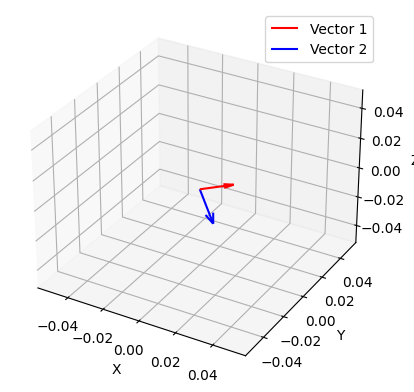

The Two vectors are orthogonal or perpendicular on each other


In [13]:
vector1_3d = vector_a[:100]
vector2_3d = vector_b[:100]

# Plot the vectors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first vector
ax.quiver(0, 0, 0, vector1_3d[0], vector1_3d[1], vector1_3d[2], color='r', label='Vector 1')

# Plot the second vector
ax.quiver(0, 0, 0, vector2_3d[0], vector2_3d[1], vector2_3d[2], color='b', label='Vector 2')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
print("The Two vectors are orthogonal or perpendicular on each other")